In [34]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold
#from mlxtend.evaluate import feature_importance_permutation

FILE_PATH = 'C:/Users/vino2/Downloads/Hackathon 2018/Documents Shared/Data File/Master_Modelling_READMIT_FIX.csv'

In [72]:
def loadData(path):
    return pd.read_csv(path)

In [73]:
data = loadData(FILE_PATH)
data.head()

,aweekend,cm_alcohol,cm_anemdef,cm_chf,cm_chrnlung,cm_coag,cm_depress,cm_dm,cm_dmcx,cm_htn_c,...,e_disabl,e_limeng,e_minrty,e_mobile,e_munit,e_nohsdp,e_noveh,e_pov,e_sngpnt,e_unemp
0,0,0,0,0,0,0,0,0,0,0,...,576,58,2353,297,27,601,156,987,186,127
1,0,0,0,0,0,0,0,1,0,1,...,872,8,458,413,0,500,0,741,72,309
2,0,0,0,0,1,0,0,0,0,0,...,610,308,2179,365,279,631,187,533,98,198
3,0,0,1,0,0,0,0,0,0,1,...,362,8,501,62,43,80,87,194,89,94
4,0,0,1,0,0,0,0,0,0,1,...,362,8,501,62,43,80,87,194,89,94


In [74]:
# Moving the readmit column to the start for easier access
readmit = data['readmit']
data.drop(labels=['readmit'], axis=1, inplace=True)
data.insert(0, 'readmit', readmit)
data.head()

,readmit,aweekend,cm_alcohol,cm_anemdef,cm_chf,cm_chrnlung,cm_coag,cm_depress,cm_dm,cm_dmcx,...,e_disabl,e_limeng,e_minrty,e_mobile,e_munit,e_nohsdp,e_noveh,e_pov,e_sngpnt,e_unemp
0,0,0,0,0,0,0,0,0,0,0,...,576,58,2353,297,27,601,156,987,186,127
1,0,0,0,0,0,0,0,0,1,0,...,872,8,458,413,0,500,0,741,72,309
2,0,0,0,0,0,1,0,0,0,0,...,610,308,2179,365,279,631,187,533,98,198
3,0,0,0,1,0,0,0,0,0,0,...,362,8,501,62,43,80,87,194,89,94
4,1,0,0,1,0,0,0,0,0,0,...,362,8,501,62,43,80,87,194,89,94


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Columns: 151 entries, readmit to e_unemp
dtypes: int64(151)
memory usage: 114.6 MB


In [80]:
print('Is there any empty values in the data:', data.isnull().any().any())

Is there any empty values in the data: False


In [83]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, 0].values

In [76]:
# Preparing the dataset for modelling
def split_data(X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return x_train, x_test, y_train, y_test

In [39]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
def metric(actual_y, pred_y):
    cm = confusion_matrix(actual_y, pred_y)
    f_score = round(f1_score(actual_y, pred_y, average="macro"), 2)
    precision = round(precision_score(actual_y, pred_y, average="macro"), 2)
    recall = round(recall_score(actual_y, pred_y, average="macro"), 2)
    auc = roc_auc_score(actual_y, pred_y)
    return cm, f_score, precision, recall, auc

In [101]:
selected_feat = ['age', 'los', 'ndx', 'npr', 'cci', 'e_minrty', 'e_disabl', 'e_nohsdp', 'e_pov', 'e_noveh', 
                 'e_sngpnt', 'e_limeng', 'ATYPE_Elective', 'e_munit', 'e_crowd', 'ftrntf', 'suropop', 'suropip', 
                 'suroptot', 'vem']
feature_data = data[selected_feat]
feature_data.insert(0, 'readmit', readmit)
feature_data.head()

,readmit,age,los,ndx,npr,cci,e_minrty,e_disabl,e_nohsdp,e_pov,...,e_sngpnt,e_limeng,ATYPE_Elective,e_munit,e_crowd,ftrntf,suropop,suropip,suroptot,vem
0,0,23,2,6,1,0,2353,576,601,987,...,186,58,1,27,53,720,7921,12808,20729,91370
1,0,61,17,10,6,8,458,872,500,741,...,72,8,1,0,15,366,4350,3365,7715,69406
2,0,67,7,13,10,7,2179,610,631,533,...,98,308,1,279,158,1744,8059,11303,19362,0
3,0,62,2,10,1,0,501,362,80,194,...,89,8,0,43,44,726,9973,7267,17240,22722
4,1,61,2,9,3,0,501,362,80,194,...,89,8,1,43,44,726,9973,7267,17240,22722


In [102]:
feature_data.shape

(99492, 21)

In [60]:
feature_data_X = feature_data.iloc[:,1:-1].values
feature_data_y = feature_data.iloc[:,0].values
x_train, x_test, y_train, y_test = split_data(feature_data_X, feature_data_y)

In [56]:
max_features = list(range(1,x_train.shape[1]))
train_auc = []
prediction_auc = []

for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature)
        #n_estimators=100, max_depth=8, n_jobs=-1)
    rf.fit(x_train, y_train)
    
    y_train_pred = rf.predict(x_train)
    y_test_pred = rf.predict(x_val)
    
    cm_train, f_score_train, precision_train, recall_train, auc_train = metric(y_train, y_train_pred)
    cm_test, f_score_test, precision_test, recall_test, auc_test = metric(y_val, y_test_pred)
    
    train_auc.append(auc_train)
    prediction_auc.append(auc_test)

C:\Users\vino2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vino2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vino2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vino2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vino2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

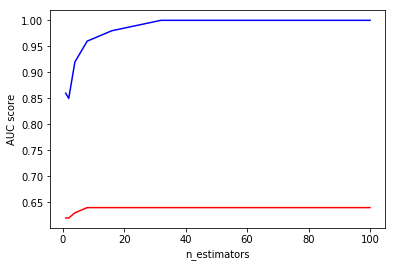

In [32]:
####
# To Find thhe number of estimatores
####
#from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt

line1 = plt.plot(n_estimators, train_fscore, 'b', label='Train AUC')
line2 = plt.plot(n_estimators, test_fscore, 'r', label='Test AUC')

#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

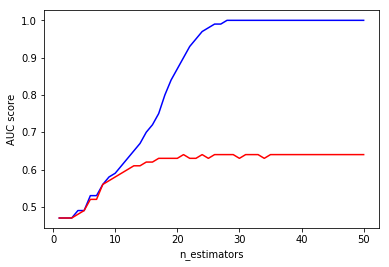

In [38]:
####
# To Find the max_depth
####
#from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt

line1 = plt.plot(max_depths, train_fscore, 'b', label='Train AUC')
line2 = plt.plot(max_depths, test_fscore, 'r', label='Test AUC')

#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('max_depths')
plt.show()

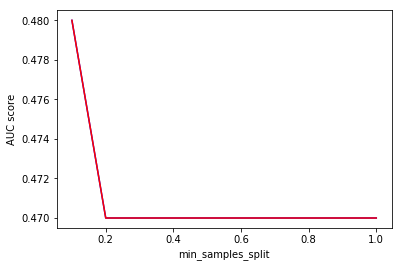

In [44]:
####
# To Find the min_samples_split
####
#from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt

line1 = plt.plot(min_samples_splits, train_fscore, 'b', label='Train AUC')
line2 = plt.plot(min_samples_splits, test_fscore, 'r', label='Test AUC')

#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min_samples_split')
plt.show()

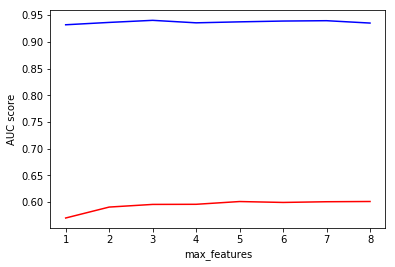

In [57]:
####
# To Find the max_features
####
#from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt

line1 = plt.plot(max_features, train_auc, 'b', label='Train AUC')
line2 = plt.plot(max_features, prediction_auc, 'r', label='Test AUC')

#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()

In [84]:
x_train_perm, x_test_perm, y_train_perm, y_test_perm = split_data(X, y)

In [88]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(RandomForestClassifier(n_estimators=100), cv=5)
perm.fit(x_train_perm, y_train_perm)

PermutationImportance(cv=5,
           estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
           n_iter=5, random_state=None, refit=True, scoring=None)

In [100]:
eli5.show_weights(perm, top=150, feature_names=data.columns[1:-1].tolist())

Weight,Feature
0.0010 ± 0.0015,ATYPE_Elective
0.0007 ± 0.0009,npr
0.0005 ± 0.0013,age
0.0004 ± 0.0008,los
0.0004 ± 0.0007,ATYPE_Urgent
0.0002 ± 0.0001,cm_valve
0.0002 ± 0.0006,DISP_HHC
0.0001 ± 0.0002,cm_neuro
0.0001 ± 0.0007,DISP_Routine
0.0001 ± 0.0004,aweekend


In [ ]:
# K-Fold cross validation on selected features
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0)
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(x_train, y_train):
    x_train, x_val = x_train[train_index], x_train[val_index]
    y_train, y_val = x_train[train_index], x_train[val_index]
    
    rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    rf.fit(x_train, y_train)
    
    y_train_pred = rf.predict(x_train)
    y_val_pred = rf.predict(x_val)
    
    cm_train, f1_train, prec_train, recall_train, auc_train = metric(y_train, y_train_pred)
    cm_val, f1_val, prec_val, recall_val, auc_val = metric(y_val, y_val_pred)
    
    train_errors.append(auc_train)
    validation_errors.append(auc_val)
    
print('train_error: ', train_errors)
print('validation_error: ', validation_errors)